In [7]:
import cv2

from skimage.segmentation import slic
from skimage.util import img_as_float

import numpy as np

from keras.models import load_model

from keras import backend as K

import matplotlib.pyplot as plt

In [2]:
# input image dimensions
img_rows, img_cols = 48, 48

In [10]:
#image = cv2.imread("data/input.bmp")
image = cv2.imread("data/data_road/testing/image_2/umm_000031.png")

segments = slic(img_as_float(image), n_segments = 200, sigma = 5)

all_x = []

unique_segments = np.unique(segments)
for (i, segVal) in enumerate(unique_segments):
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 255

    m = cv2.moments(mask, True);
    #print("centroid coordinates %d : %d" % (m["m10"]/m["m00"], m["m01"]/m["m00"]))

    x = m["m10"]/m["m00"]
    y = m["m01"]/m["m00"]


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_and(gray, gray, mask = mask)

    #intersection_mask = intersection.astype(np.uint8)
    #intersection_mask *= 255
    #img2 = cv2.bitwise_and(gray, gray, mask = intersection_mask)
    #img2 = img2[int(y - img_rows/2) : int(y + img_rows/2), int(x - img_cols/2) : int(x + img_cols/2)]

    #crop
    img = img[int(y - img_rows/2) : int(y + img_rows/2), int(x - img_cols/2) : int(x + img_cols/2)]

    old_size = img.shape[:2]
    delta_w = img_cols - old_size[1]#img.cols
    delta_h = img_rows - old_size[0]#img.rows
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)


    #all_x.append(np.asarray(img[:,:]))
    all_x.append([img])
    
all_x = np.concatenate(all_x)

In [11]:
if K.image_data_format() == 'channels_first':
    all_x = all_x.reshape(all_x.shape[0], 1, img_rows, img_cols)
else:
    all_x = all_x.reshape(all_x.shape[0], img_rows, img_cols, 1)

all_x = all_x.astype('float32')
all_x /= 255


model = load_model('my_model.h5')

ynew = model.predict_classes(all_x)

In [12]:
print(ynew)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0]


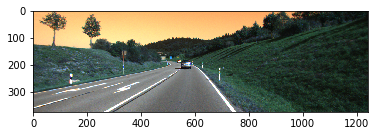

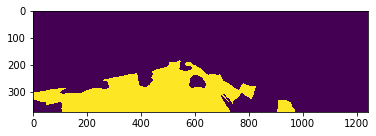

In [13]:
mask = np.zeros(image.shape[:2], dtype = "uint8")

for (i, segVal) in enumerate(unique_segments):
    #print("[x] inspecting segment %d" % (i))
    if ynew[i] == 0:
        continue
    mask[segments == segVal] = 255
    
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(mask)